In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


df=pd.read_csv("data/data.csv")

In [2]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


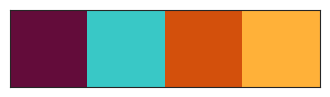

In [3]:
#To stabilize the output
np.random.seed(42)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [5]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [7]:
s=df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(170652)

In [8]:
s.head()

artists
['The Beatles']           19218
['Frank Sinatra']         17987
['Elvis Presley']         17188
['The Rolling Stones']    16477
['Fleetwood Mac']         15675
Name: popularity, dtype: int64

In [9]:
s.head(10)

artists
['The Beatles']           19218
['Frank Sinatra']         17987
['Elvis Presley']         17188
['The Rolling Stones']    16477
['Fleetwood Mac']         15675
['Bob Dylan']             14570
['Led Zeppelin']          13498
['Queen']                 13202
['Johnny Cash']           12802
['The Beach Boys']        12216
Name: popularity, dtype: int64

<AxesSubplot:>

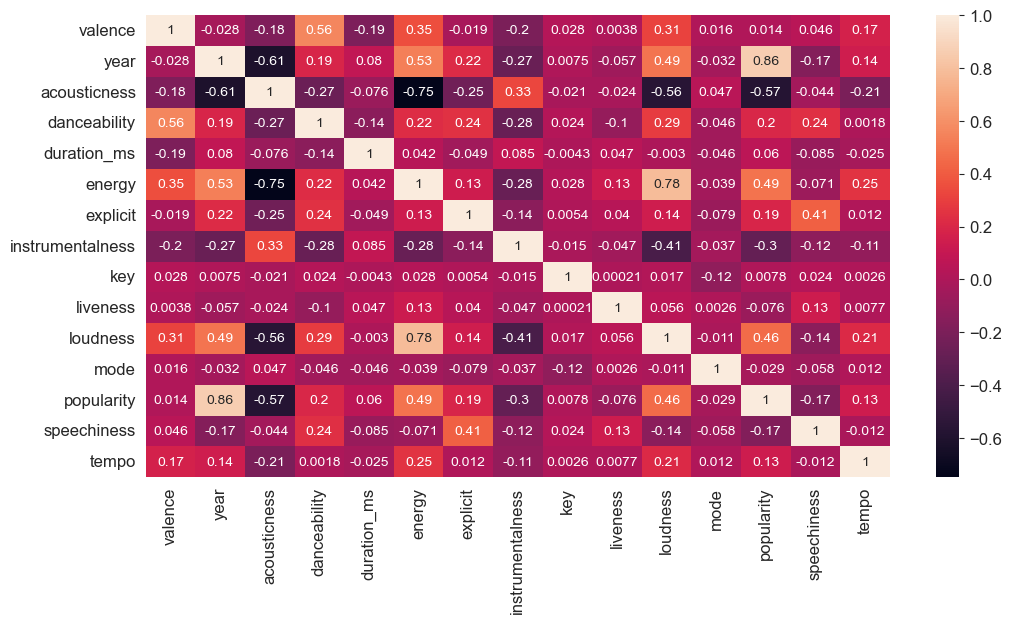

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)


<Figure size 2000x1200 with 0 Axes>

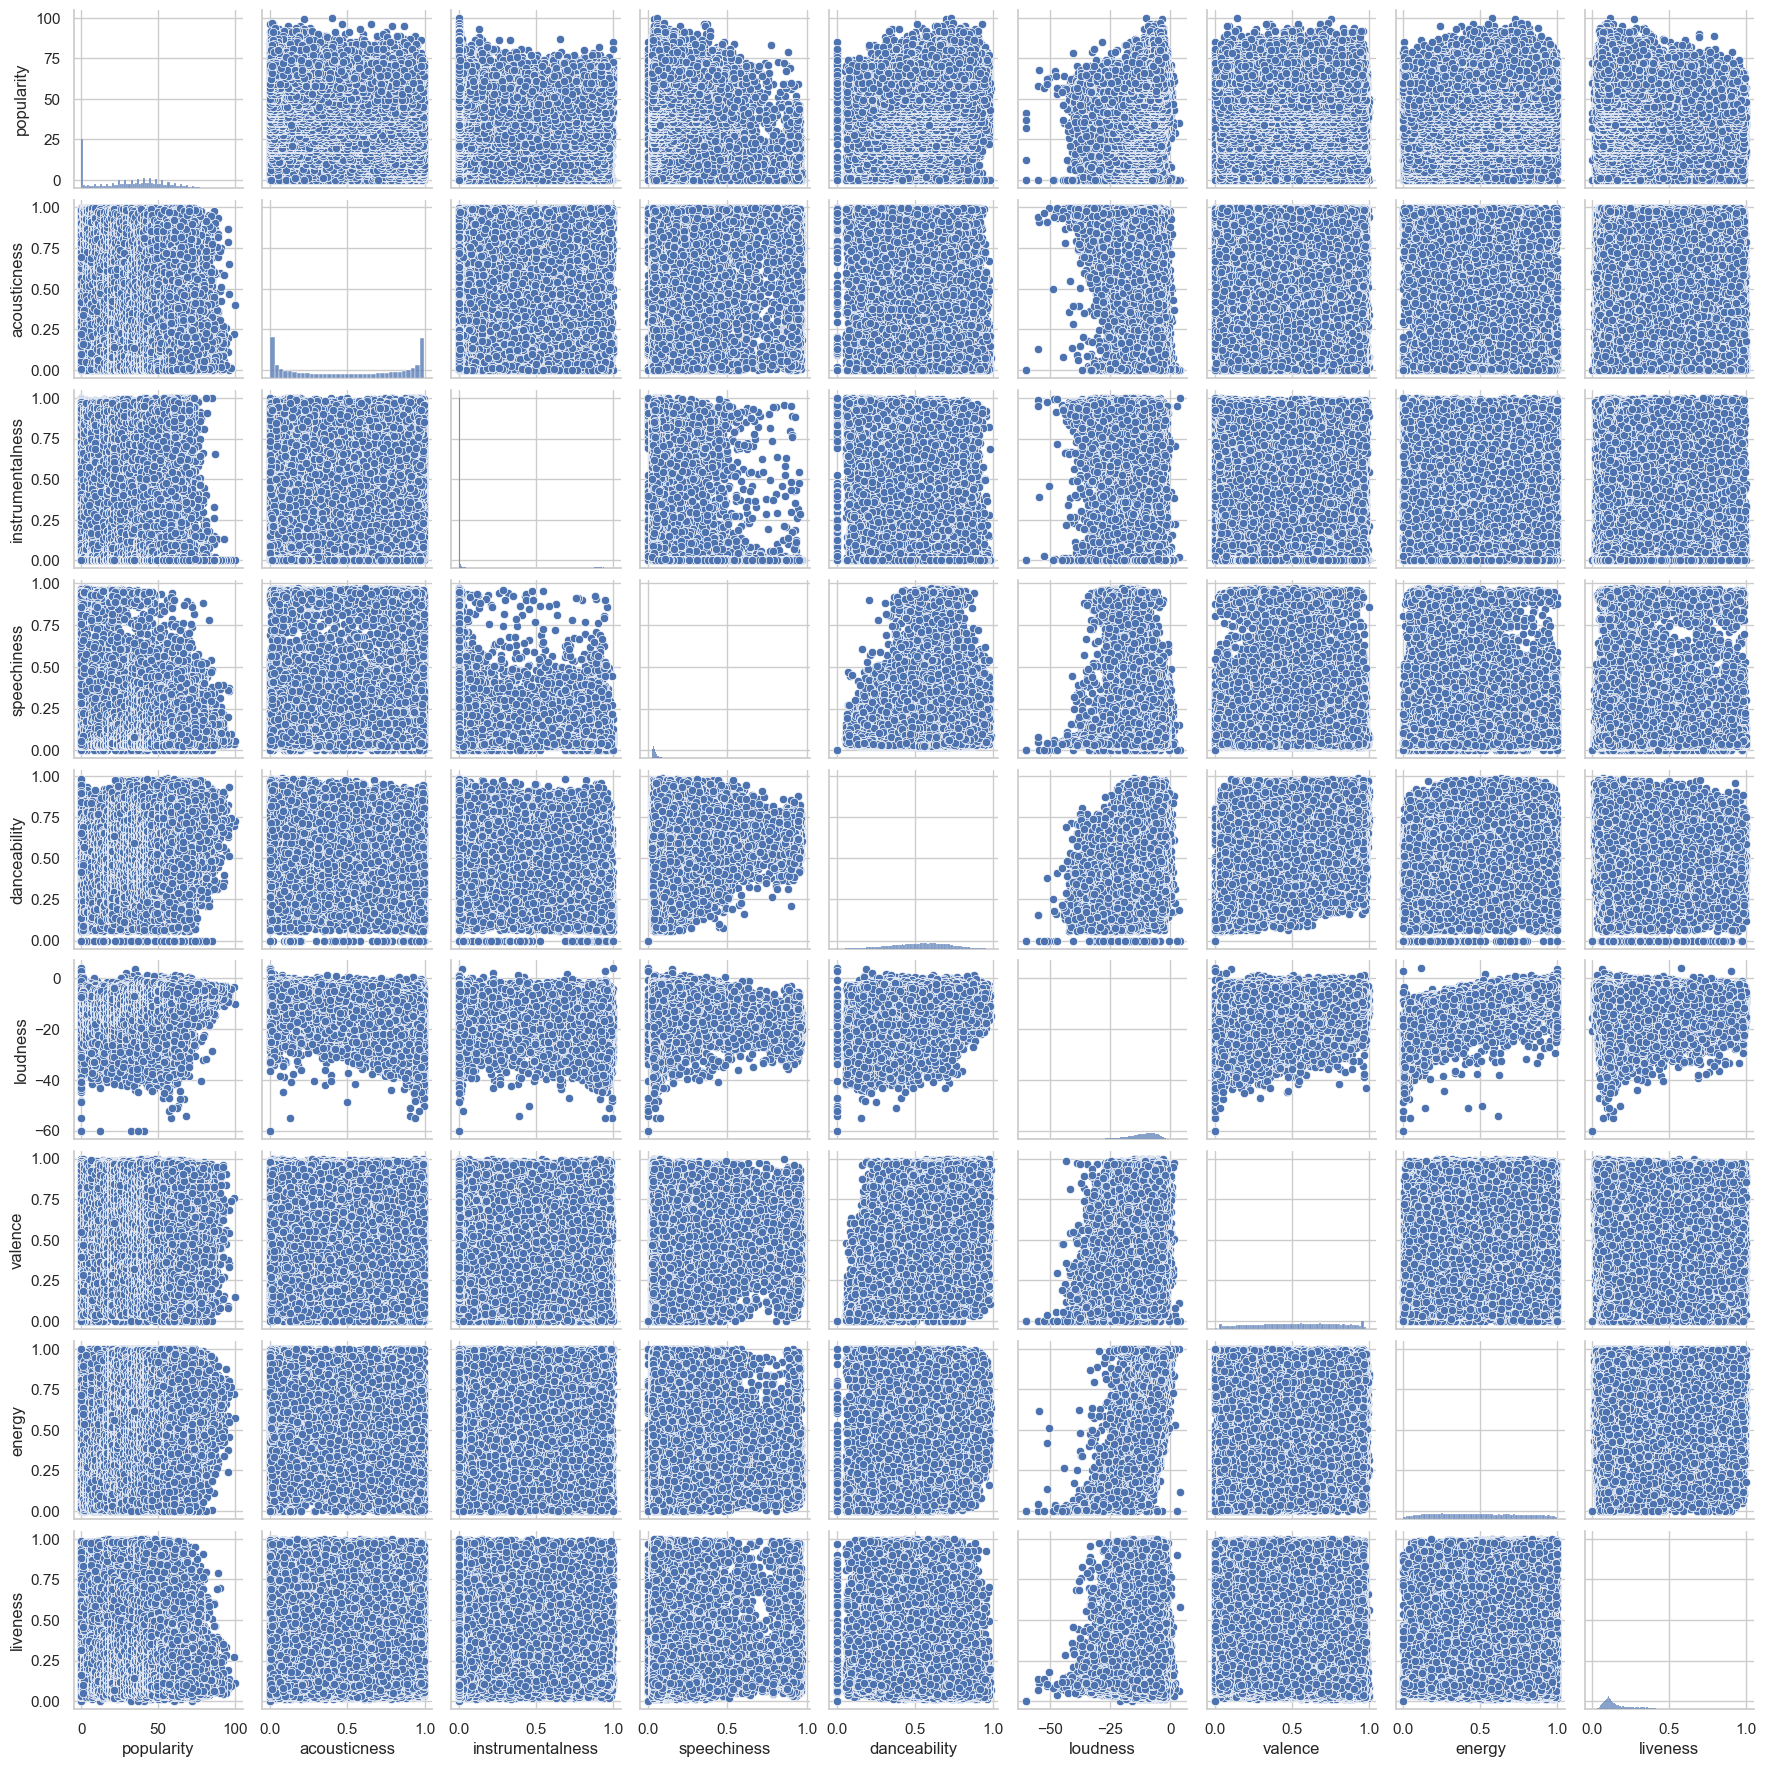

In [11]:
plt.figure(figsize=(20, 12))
sns.set(style="whitegrid")
cols = ["popularity","acousticness","instrumentalness","speechiness","danceability","loudness","valence","energy","liveness" ]
sns.pairplot(df[cols], height = 2)
plt.show();

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

# FEATURE SELECTION

In [13]:
X_features = df[['danceability','liveness','acousticness','loudness','speechiness','instrumentalness','energy']]

# DATA WRANGLING

C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\3724592518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_features['loudness'] = pd.DataFrame(loudness_scaled)


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'energy'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

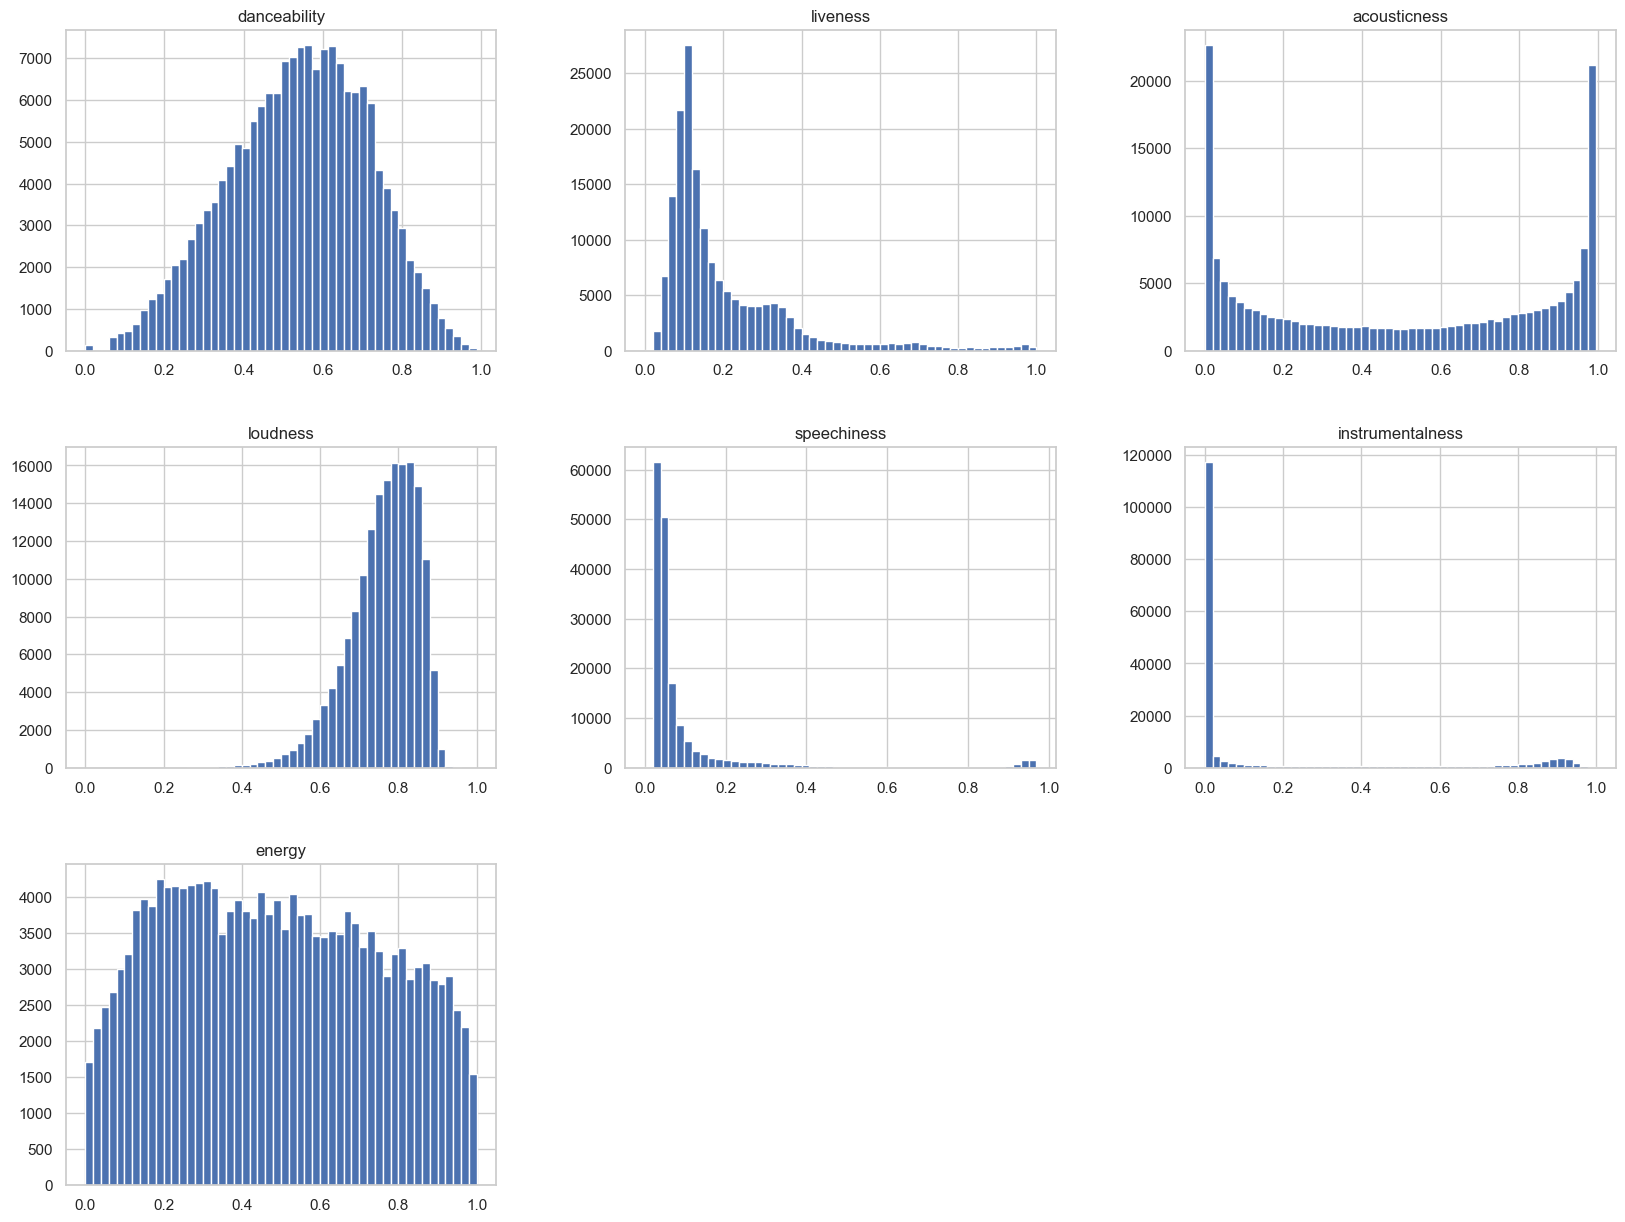

In [14]:


loudness = X_features['loudness'].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness.reshape(-1,1))
X_features['loudness'] = pd.DataFrame(loudness_scaled)

#features_to_be_extracted = df[['danceability','liveness','acousticness','loudness','speechiness','valence','energy']]




X_features.hist(bins=50,figsize=(20,15))

In [15]:
features_extracted=X_features.values
features_extracted

array([[2.79e-01, 6.65e-01, 9.82e-01, ..., 3.66e-02, 8.78e-01, 2.11e-01],
       [8.19e-01, 1.60e-01, 7.32e-01, ..., 4.15e-01, 0.00e+00, 3.41e-01],
       [3.28e-01, 1.01e-01, 9.61e-01, ..., 3.39e-02, 9.13e-01, 1.66e-01],
       ...,
       [6.34e-01, 2.58e-01, 1.01e-01, ..., 8.09e-02, 8.56e-06, 8.58e-01],
       [6.71e-01, 6.43e-01, 9.98e-03, ..., 3.08e-01, 7.55e-06, 6.23e-01],
       [8.56e-01, 1.82e-01, 1.32e-01, ..., 1.08e-01, 4.71e-03, 7.21e-01]])

In [16]:


sse = {}
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features_extracted)
    sse[k]=km.inertia_


<AxesSubplot:title={'center':'Elbow Method To Find k'}, xlabel='k', ylabel='sse'>

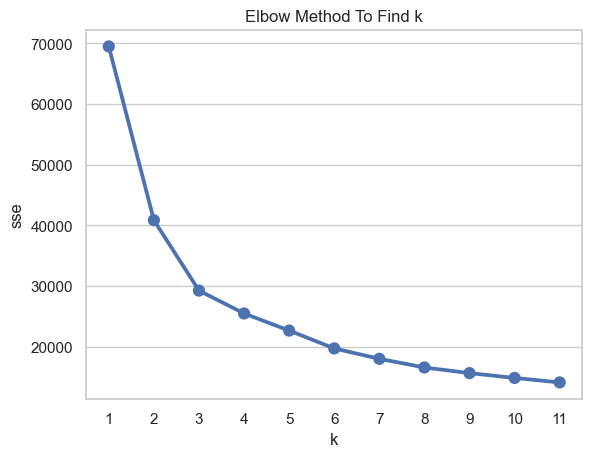

In [17]:
plt.xlabel('k')
plt.ylabel('sse')
plt.title('Elbow Method To Find k')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))

# CLUSTERING AND MOOD PREDICTION

In [18]:
kmeans = KMeans(n_clusters=4)
kmeans=kmeans.fit(features_extracted)
preds=kmeans.predict(features_extracted)

In [19]:
preds

array([1, 0, 1, ..., 2, 2, 2])

In [20]:
df['cluster']=preds
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,0
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,1
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0


## Visualization

In [21]:
from sklearn import decomposition
pca_vis=decomposition.PCA(n_components=2)
pca_vis_result=pca_vis.fit_transform(features_extracted)
new_vis_df=pd.DataFrame(pca_vis_result)
new_vis_df['cluster']=preds

C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\3926263963.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  vis_fig.show()


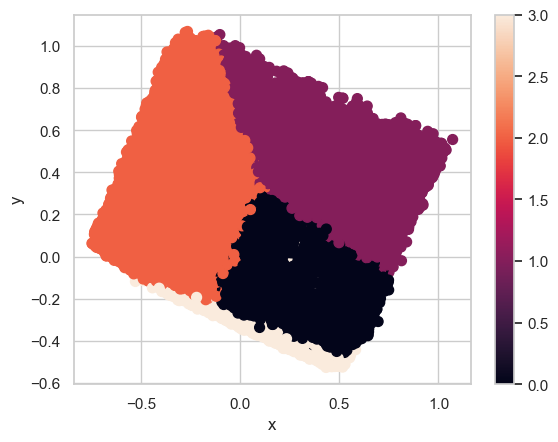

In [22]:
vis_fig=plt.figure()
ax=vis_fig.add_subplot(111)
scatter = ax.scatter(new_vis_df.iloc[:,0].values, new_vis_df.iloc[:,1].values,c=preds,s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)

vis_fig.show()

In [23]:
classification_df=df[["acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness","cluster"]]
X=classification_df.iloc[:,:-1].values
y=classification_df.iloc[:,-1].values


In [24]:
classification_df.iloc[:,:-1]

,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness
0,0.98200,0.279,0.6650,0.211,0.878000,-20.096,0.0366
1,0.73200,0.819,0.1600,0.341,0.000000,-12.441,0.4150
2,0.96100,0.328,0.1010,0.166,0.913000,-14.850,0.0339
3,0.96700,0.275,0.3810,0.309,0.000028,-9.316,0.0354
4,0.95700,0.418,0.2290,0.193,0.000002,-10.096,0.0380
...,...,...,...,...,...,...,...
170648,0.08460,0.786,0.0822,0.808,0.000289,-3.702,0.0881
170649,0.20600,0.717,0.1010,0.753,0.000000,-6.020,0.0605
170650,0.10100,0.634,0.2580,0.858,0.000009,-2.226,0.0809
170651,0.00998,0.671,0.6430,0.623,0.000008,-7.161,0.3080


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [26]:
X_test

array([[ 9.9300e-01,  4.8800e-01,  2.0000e-01, ...,  3.1400e-03,
        -9.5700e+00,  1.3400e-01],
       [ 9.7900e-01,  6.2600e-01,  4.9900e-02, ...,  5.5400e-01,
        -5.5620e+00,  5.0600e-02],
       [ 9.1600e-01,  2.2200e-01,  1.1000e-01, ...,  1.0400e-02,
        -1.7067e+01,  3.8100e-02],
       ...,
       [ 9.9300e-01,  4.8300e-01,  1.8800e-01, ...,  2.3300e-05,
        -1.3751e+01,  7.0900e-02],
       [ 7.9500e-01,  6.2300e-01,  3.4600e-01, ...,  3.5300e-05,
        -8.3090e+00,  4.1100e-02],
       [ 3.1500e-02,  9.0000e-01,  1.0100e-01, ...,  0.0000e+00,
        -6.3710e+00,  2.7400e-01]])

In [27]:
X_train[:,5]=min_max_scaler.fit_transform(X_train[:,5].reshape(-1,1)).reshape(-1,)
X_test[:,5]=min_max_scaler.transform(X_test[:,5].reshape(-1,1)).reshape(-1,)


## Selecting classifiers

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

warnings.filterwarnings(action="ignore", message="^internal gelsd")

acc=[]
for i in range(2,10):
    kClassifier=KNeighborsClassifier(n_neighbors=i,p=5)
    kClassifier.fit(X_train,y_train)
    y_pred=kClassifier.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
print(acc)
warnings.filterwarnings(action="ignore", message="^internal gelsd")

C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[0.9860830330198354, 0.98927661070581, 0.9886027365151915, 0.9902141747971053, 0.9898918871407225, 0.9908001523541649, 0.9904485658199291, 0.9908880489877238]


In [29]:
print("KNeighborsClassifier best Accuracy",max(acc))

KNeighborsClassifier best Accuracy 0.9908880489877238


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

acc=[]
for i in range(5,14):
    rfc=RandomForestClassifier(n_estimators=i,criterion='entropy')
    rfc.fit(X_train,y_train)
    y_predict=rfc.predict(X_test)
    acc.append(accuracy_score(y_test,y_predict))
    

In [31]:
print("RandomForestClassifier Best Accuracy",max(acc))

RandomForestClassifier Best Accuracy 0.9940816266736984


In [32]:
from sklearn.svm import SVC
acc=[]
for i in ['linear', 'poly', 'rbf']:
  svc = SVC(kernel = i, random_state = 0)
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  print(f'{i}:{acc[-1]}')

linear:0.9983592628402332
poly:0.998710849374469
rbf:0.9981834695731153


In [33]:
print("SupportVectorClassifier Best Accuracy",max(acc))

SupportVectorClassifier Best Accuracy 0.998710849374469


In [34]:
svc=SVC(kernel='poly',random_state=0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12130    13     8     0]
 [    6  5212     3     0]
 [    8     3 15603     0]
 [    1     0     2  1142]]


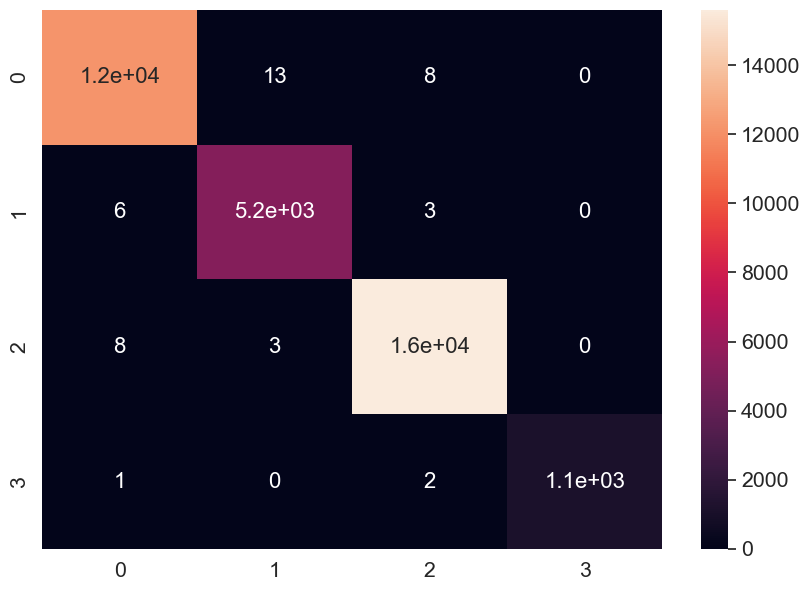

In [35]:
df_cm = pd.DataFrame(cm, range(4), range(4))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

## Cluster Interpretation

In [36]:
cluster_df=df[["id","acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness","cluster"]]

In [37]:
cluster_df.head()

,id,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness,cluster
0,4BJqT0PrAfrxzMOxytFOIz,0.982,0.279,0.665,0.211,0.878000,-20.096,0.0366,1
1,7xPhfUan2yNtyFG0cUWkt8,0.732,0.819,0.160,0.341,0.000000,-12.441,0.4150,0
2,1o6I8BglA6ylDMrIELygv1,0.961,0.328,0.101,0.166,0.913000,-14.850,0.0339,1
3,3ftBPsC5vPBKxYSee08FDH,0.967,0.275,0.381,0.309,0.000028,-9.316,0.0354,0
4,4d6HGyGT8e121BsdKmw9v6,0.957,0.418,0.229,0.193,0.000002,-10.096,0.0380,0


In [38]:
clusters=[]
for i in range(4):
    clusters.append(cluster_df[cluster_df['cluster']==i].describe().iloc[1,:])

In [39]:
clusters

[acousticness         0.799381
 danceability         0.510011
 liveness             0.203410
 energy               0.323399
 instrumentalness     0.031056
 loudness           -12.838986
 speechiness          0.064136
 cluster              0.000000
 Name: mean, dtype: float64,
 acousticness         0.884725
 danceability         0.423939
 liveness             0.182722
 energy               0.246886
 instrumentalness     0.815285
 loudness           -17.454593
 speechiness          0.060070
 cluster              1.000000
 Name: mean, dtype: float64,
 acousticness        0.144778
 danceability        0.586683
 liveness            0.208550
 energy              0.699025
 instrumentalness    0.067030
 loudness           -7.937931
 speechiness         0.083328
 cluster             2.000000
 Name: mean, dtype: float64,
 acousticness         0.516188
 danceability         0.677427
 liveness             0.306014
 energy               0.252194
 instrumentalness     0.004028
 loudness           -1

In [40]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,0
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,1
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0


In [41]:
df['name']=df['name'].str.upper()
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"PIANO CONCERTO NO. 3 IN D MINOR, OP. 30: III. ...",4,1921,0.0366,80.954,1
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,CLANCY LOWERED THE BOOM,5,1921,0.4150,60.936,0
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,GATI BALI,5,1921,0.0339,110.339,1
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,DANNY BOY,3,1921,0.0354,100.109,0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,WHEN IRISH EYES ARE SMILING,2,1921,0.0380,101.665,0


## Getting song details from spotify

In [42]:
#Getting song details from spotify
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import json
import requests

In [43]:
username='Rohit Kovur'
client_id='703badf414e24720bedcfd080ed682ff'
client_secret='e9d21b426d74462dade4c22ca6029ef6'
redirect_uri='http://localhost:8080/'

#scope='user-library-read user-read-recently-played playlist-modify-public playlist-read-private user-top-read playlist-modify-private user-read-currently-playing'
scope='user-read-recently-played'
token=util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=client_secret,     
                                   redirect_uri=redirect_uri)
client_credentials_manager = spotipy.oauth2.SpotifyOAuth(scope=scope, username=username,client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, cache_path='./tokens.txt') #SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [44]:
def extract_json_value(column_name,data):
    return [i[column_name] for i in data]

In [46]:
jsondata=json.load(open('SpotifyUserData/StreamingHistory0.json',encoding='utf-8'))
jsondata
mystreamingdata=pd.DataFrame()

mystreamingdata['artist_name']=extract_json_value('artistName',jsondata)
mystreamingdata['track_name']=extract_json_value('trackName',jsondata)
mystreamingdata['end_time']=extract_json_value('endTime',jsondata)
mystreamingdata['ms_played']=extract_json_value('msPlayed',jsondata)
mystreamingdata

mystreamingdata['track_id']=mystreamingdata.apply(lambda x:get_id(x['track_name'],x['artist_name'],token),axis=1)


In [45]:
def get_id(track_name,artist_name,token):
    headers={
        'Accept':'application/json',
        'Content-Type':'application/json',
        'Authorization':f'Bearer '+token
    }
    trackwithartist=track_name+artist_name
    params=[
        ('q',trackwithartist),
        ('type','track')
    ]
    
    try:
        response=requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 10)
        json=response.json()
        track_id=json['tracks']['items'][0]['id']
        return track_id
    except:
        return None

In [ ]:
mystreamingdata['track_id']=mystreamingdata.apply(lambda x:get_id(x['track_name'],x['artist_name'],token),axis=1)

In [47]:
mystreamingdata

,artist_name,track_name,end_time,ms_played,track_id
0,Pritam,Khudaya Khair,2022-11-22 15:58,280557,2XYyriLyJSuGj4FN7QoNmM
1,Mohit Chauhan,Masakali,2022-11-22 15:59,10028,5iyNH1Dmxif1k4Nl1gMeuh
2,Pritam,Bheegi Si Bhaagi Si,2022-11-22 15:59,1227,665b3Nss3OQmhTUdB5hBXw
3,Shankar-Ehsaan-Loy,Bol Na Halke Halke,2022-11-22 16:04,306834,0u8wprNfOdcWpUlWnfMcpP
4,Javed-Mohsin,Pal,2022-11-22 16:08,247286,7KKgE6UHxqhuxkNV2k3AKn
...,...,...,...,...,...
1637,Shaan,Dus Bahane,2023-11-17 21:47,206946,1vBmaijoCBoqmwc3zs5n3s
1638,Pritam,Kabira,2023-11-17 21:56,223459,4bD9z9qa4qg9BhryvYWB7c
1639,Rahat Fateh Ali Khan,Aas Paas Khuda,2023-11-17 22:01,319115,3kuxr8U3QynLzyW82p5hYR
1640,Kishore Kumar,"Mere Samnewali Khidki Mein (From ""Padosan"")",2023-11-18 02:34,172570,07tgpd5TOltMIUly3ITsls


In [48]:
trackIdList=list(mystreamingdata['track_id'].dropna().unique())
feature_set=pd.DataFrame(columns=[
    "track_id","acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness"
])

try:
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, 
                                                      client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager,requests_timeout=100)
    for track in trackIdList:
        print (track)
        features = sp.audio_features(tracks = [track])[0]
        if features is not None:
            feature_set = feature_set.append({
                "track_id":track,
                "track_name":mystreamingdata[mystreamingdata['track_id']==track]["track_name"].iloc[1],
                "energy":features['energy'], 
                "liveness":features['liveness'],
                "speechiness":features['speechiness'],
                "acousticness":features['acousticness'],
                "instrumentalness":features['instrumentalness'],
                "danceability":features['danceability'],
                "loudness":features['loudness'],
                },ignore_index=True)
            
except:
    print("Done!")
    

2XYyriLyJSuGj4FN7QoNmM


C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\1334444773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_set = feature_set.append({
C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\1334444773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_set = feature_set.append({
C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\1334444773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_set = feature_set.append({
C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\1334444773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_set = feature_set.append({


5iyNH1Dmxif1k4Nl1gMeuh
665b3Nss3OQmhTUdB5hBXw
0u8wprNfOdcWpUlWnfMcpP
7KKgE6UHxqhuxkNV2k3AKn


C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\1334444773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_set = feature_set.append({
C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\1334444773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_set = feature_set.append({
C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\1334444773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_set = feature_set.append({
C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\1334444773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_set = feature_set.append({


4N66qcycDiFLJGjnXiKbKX
1qriL63qImdxwjsZH4TUBM
7A3HdpivKNGgTW2Bo3udV8
7i5RXazKlqqRN5rQoNSFnS


C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\1334444773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_set = feature_set.append({
C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\1334444773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_set = feature_set.append({
C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\1334444773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_set = feature_set.append({
C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\1334444773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_set = feature_set.append({


6vnND7QAHhtMNQRHihly2t
0mZ2npJ5BDO4w3rmmFvAAu
0hwlEWBrraTWI9PTNzG0RJ
1llCrHsp3meUV30YTiTwpY
1KI8Efg4oeYeBg1xxNUMBL
1yQrrTdeNFWpdXLNkgFnIZ
Done!


C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\1334444773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_set = feature_set.append({
C:\Users\Rohit\AppData\Local\Temp\ipykernel_16340\1334444773.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_set = feature_set.append({


In [49]:
feature_set

,track_id,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness,track_name
0,2XYyriLyJSuGj4FN7QoNmM,0.45000,0.573,0.1620,0.746,0,-5.699,0.0705,Khudaya Khair
1,5iyNH1Dmxif1k4Nl1gMeuh,0.13800,0.678,0.1220,0.622,0.000002,-7.988,0.0695,Masakali
2,665b3Nss3OQmhTUdB5hBXw,0.36100,0.564,0.2620,0.867,0,-6.210,0.1210,Bheegi Si Bhaagi Si
3,0u8wprNfOdcWpUlWnfMcpP,0.27900,0.637,0.0617,0.573,0.000003,-6.690,0.0491,Bol Na Halke Halke
4,7KKgE6UHxqhuxkNV2k3AKn,0.52400,0.535,0.0970,0.621,0.000004,-7.434,0.0345,Pal
5,4N66qcycDiFLJGjnXiKbKX,0.35400,0.693,0.0972,0.638,0.000003,-6.715,0.0498,Sajde
6,1qriL63qImdxwjsZH4TUBM,0.55200,0.493,0.1340,0.533,0.000014,-10.636,0.0409,Prema Swaramulalo
7,7A3HdpivKNGgTW2Bo3udV8,0.02200,0.804,0.0759,0.623,0,-9.891,0.0914,Nuvvunte
8,7i5RXazKlqqRN5rQoNSFnS,0.18200,0.811,0.0632,0.910,0,-4.875,0.0826,Raanu Raanu
9,6vnND7QAHhtMNQRHihly2t,0.37900,0.799,0.0879,0.635,0.000024,-7.906,0.1450,Cheliya Cheliya


In [50]:
loudness_scaler=feature_set['loudness'].values
loud_scaled=min_max_scaler.fit_transform(loudness_scaler.reshape(-1,1))
feature_set['loudness']=loud_scaled
feature_set

,track_id,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness,track_name
0,2XYyriLyJSuGj4FN7QoNmM,0.45000,0.573,0.1620,0.746,0,0.748825,0.0705,Khudaya Khair
1,5iyNH1Dmxif1k4Nl1gMeuh,0.13800,0.678,0.1220,0.622,0.000002,0.401638,0.0695,Masakali
2,665b3Nss3OQmhTUdB5hBXw,0.36100,0.564,0.2620,0.867,0,0.671318,0.1210,Bheegi Si Bhaagi Si
3,0u8wprNfOdcWpUlWnfMcpP,0.27900,0.637,0.0617,0.573,0.000003,0.598514,0.0491,Bol Na Halke Halke
4,7KKgE6UHxqhuxkNV2k3AKn,0.52400,0.535,0.0970,0.621,0.000004,0.485667,0.0345,Pal
5,4N66qcycDiFLJGjnXiKbKX,0.35400,0.693,0.0972,0.638,0.000003,0.594722,0.0498,Sajde
6,1qriL63qImdxwjsZH4TUBM,0.55200,0.493,0.1340,0.533,0.000014,0.000000,0.0409,Prema Swaramulalo
7,7A3HdpivKNGgTW2Bo3udV8,0.02200,0.804,0.0759,0.623,0,0.112999,0.0914,Nuvvunte
8,7i5RXazKlqqRN5rQoNSFnS,0.18200,0.811,0.0632,0.910,0,0.873806,0.0826,Raanu Raanu
9,6vnND7QAHhtMNQRHihly2t,0.37900,0.799,0.0879,0.635,0.000024,0.414076,0.1450,Cheliya Cheliya


In [51]:
feature_set

,track_id,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness,track_name
0,2XYyriLyJSuGj4FN7QoNmM,0.45000,0.573,0.1620,0.746,0,0.748825,0.0705,Khudaya Khair
1,5iyNH1Dmxif1k4Nl1gMeuh,0.13800,0.678,0.1220,0.622,0.000002,0.401638,0.0695,Masakali
2,665b3Nss3OQmhTUdB5hBXw,0.36100,0.564,0.2620,0.867,0,0.671318,0.1210,Bheegi Si Bhaagi Si
3,0u8wprNfOdcWpUlWnfMcpP,0.27900,0.637,0.0617,0.573,0.000003,0.598514,0.0491,Bol Na Halke Halke
4,7KKgE6UHxqhuxkNV2k3AKn,0.52400,0.535,0.0970,0.621,0.000004,0.485667,0.0345,Pal
5,4N66qcycDiFLJGjnXiKbKX,0.35400,0.693,0.0972,0.638,0.000003,0.594722,0.0498,Sajde
6,1qriL63qImdxwjsZH4TUBM,0.55200,0.493,0.1340,0.533,0.000014,0.000000,0.0409,Prema Swaramulalo
7,7A3HdpivKNGgTW2Bo3udV8,0.02200,0.804,0.0759,0.623,0,0.112999,0.0914,Nuvvunte
8,7i5RXazKlqqRN5rQoNSFnS,0.18200,0.811,0.0632,0.910,0,0.873806,0.0826,Raanu Raanu
9,6vnND7QAHhtMNQRHihly2t,0.37900,0.799,0.0879,0.635,0.000024,0.414076,0.1450,Cheliya Cheliya


In [52]:
feature_set[feature_set['track_name']==current_song][['acousticness','speechiness']]

NameError: name 'current_song' is not defined

In [ ]:
username='Rohit Kovur'
client_id='703badf414e24720bedcfd080ed682ff'
client_secret='e9d21b426d74462dade4c22ca6029ef6'
redirect_uri='http://localhost:8080/'

scope='user-library-read user-read-recently-played playlist-modify-public playlist-read-private user-top-read playlist-modify-private user-read-currently-playing'

#token=util.prompt_for_user_token(username=username, 
                                   #scope=scope, 
                                   #client_id=client_id,   
                                   #client_secret=client_secret,     
                                   #redirect_uri=redirect_uri)
client_credentials_manager = spotipy.oauth2.SpotifyOAuth(scope=scope, username=username,client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, cache_path='./tokens.txt') #SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Final Input and Output

In [56]:
mood_list=["Sad","Rap","Working/Thinking","High / Upbeat"]
def recommend_songs(cluster_index):
    songs_cluster=df[df['cluster']==cluster_index]
    print("Mood predicted",mood_list[cluster_index])
    n=len(songs_cluster)
    random_indices=np.random.randint(n,size=5)
    for i in random_indices:
        print(songs_cluster['name'].iloc[i])
    print("-----End of this Execution--------")
        
def get_song_metrics(current_song):
    feature_scope=feature_set[feature_set['track_name']==current_song][["acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness"]]
    predicted_mood=svc.predict(feature_scope)
    recommend_songs(predicted_mood[0])
    
    

names_list=df.name.to_list()
#five_recommendations
def five_recommendations(current_song):
    #If current song is already in the data; find the cluster and recommend songs on that cluster
    current_song_=current_song.upper()
    if current_song in names_list:
        song_features=df[df['name']==current_song][["acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness"]]
        predicted_mood=svc.predict(song_features)
        recommend_songs(predicted_mood[0])
        
        recommend_songs(predicted_cluster)
    #If the current song is not in the data; call the classifier to determine the mood of the listener;
    #and recommend songs from that cluster
    #Execute the Getting song details from spotify code before you run this
    else:
        get_song_metrics(current_song)
    

#Input the current song
try:
    while True:
        current_song=input()
        five_recommendations(current_song)
except:
    print("I don't have suggestions for this song!")

Pal


C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Mood predicted Sad
ROMANCE IN THE DARK (WITH EDDIE HEYWOOD & HIS ORCHESTRA) - TAKE 3
LO SIENTO POR TI
MAIN NE KAHA BABUJI
OATS AND BEANS AND BARLEY
TWISTIN' IN THE KITCHEN WITH DINAH
-----End of this Execution--------
plap
I don't have suggestions for this song!


C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
